# Installations

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=ab5577de522eb7d0e8751e77237ffe1faa6e4ec1c9a20da73dfa0fe11f8c264a
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [ ]:
pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 8.9 MB/s eta 0:00:00


In [ ]:
!pip install sklearn-crfsuite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 6.0 MB/s eta 0:00:00


In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-9cmrz_iz
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-9cmrz_iz
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=286442a982111d96aa76dcf30145975c0e4e215a4311bec2932d711bc73e85fb
  Stored in directory: /tmp/pip-ephem-wheel-cache-yejiwh_l/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
!pip install git+https://github.com/MeMartijn/updated-sklearn-crfsuite.git #egg=sklearn_crfsuite

  Cloning https://github.com/MeMartijn/updated-sklearn-crfsuite.git to /tmp/pip-req-build-9jsi2tjl
  Running command git clone --filter=blob:none --quiet https://github.com/MeMartijn/updated-sklearn-crfsuite.git /tmp/pip-req-build-9jsi2tjl
  Resolved https://github.com/MeMartijn/updated-sklearn-crfsuite.git to commit 675038761b4405f04691a83339d04903790e2b95
  Preparing metadata (setup.py) ... done


In [ ]:
pip install livelossplot

In [ ]:
!pip install sklearn-crfsuite

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Votre code ici


In [ ]:
from tensorflow import keras
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from math import nan
from keras.optimizers import Optimizer

from tensorflow.keras.utils import to_categorical
# **Second**rflow_addons.layers import CRF


from subprocess import check_output

# Importing cleaned data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/df_cleaned.csv')

In [ ]:
df

,sentences,words,tag,label,sentence_id
0,menu opener,menu,O,other,0
1,menu opener,opener,O,other,0
2,our hotels,our,O,other,1
3,our hotels,hotel,O,other,1
4,back,back,O,other,2
...,...,...,...,...,...
77432,7.6,7.6,B-STAR,NB_STARS,23112
77433,7.6,7.6,B-STAR,NB_STARS,23113
77434,7.6,7.6,B-STAR,NB_STARS,23114
77435,7.6,7.6,B-STAR,NB_STARS,23115


# **BERT before Undersampling**

In [ ]:
import torch
import random
import numpy as np

seed = 42  # Choisissez n'importe quel nombre pour la graine
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)

In [ ]:
pip install transformers

In [ ]:
pip install seqeval

In [ ]:
pip install pytorch-transformers

In [ ]:
import pandas as pd
import math
import numpy as np
from seqeval.metrics import f1_score
from seqeval.metrics import classification_report,accuracy_score,f1_score
import torch.nn.functional as F
import torch
import os
from tqdm import tqdm,trange
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_transformers import BertTokenizer, BertConfig
from pytorch_transformers import BertForTokenClassification, AdamW

In [ ]:
df

In [ ]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["{}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(df)
sentences = [[s[0] for s in sent] for sent in getter.sentences]
print(sentences[5])

['our', 'best', 'destination']


In [ ]:
from numpy import max
MAX_LEN = max([len(s) for s in sentences])
print ('Maximum sequence length in the list of sentences:', MAX_LEN)

Maximum sequence length in the list of sentences: 25


In [ ]:
tags = [[s[1] for s in sent] for sent in getter.sentences]

print (sentences[5])
print(tags[5])

In [ ]:
tag_values = list(set(df["tag"].values))

#Padding is addded end of each sentence,
tag_values.append("PAD")
tag_values

['I-RACAT',
 'B-CATTYPE',
 'I-TAXCAT',
 'B-TAXCAT',
 'B-SLD',
 'B-RACAT',
 'B-PTYPE',
 'I-FPR',
 'I-HOTNAME',
 'B-STAR',
 'B-NIGHTS',
 'I-CATTYPE',
 'I-CURR',
 'I-STAR',
 'I-RONAME',
 'B-INCL',
 'I-PTYPE',
 'B-PR',
 'B-RNAME',
 'I-NIGHTS',
 'I-PR',
 'O',
 'I-OCC',
 'B-CURR',
 'B-FPR',
 'B-OCC',
 'I-INCL',
 'B-HOTNAME',
 'I-RNAME',
 'B-TAXVAL',
 'B-RONAME',
 'PAD']

In [ ]:
tag2idx = {t: i for i, t in enumerate(tag_values)}
tag2idx

{'I-RACAT': 0,
 'B-CATTYPE': 1,
 'I-TAXCAT': 2,
 'B-TAXCAT': 3,
 'B-SLD': 4,
 'B-RACAT': 5,
 'B-PTYPE': 6,
 'I-FPR': 7,
 'I-HOTNAME': 8,
 'B-STAR': 9,
 'B-NIGHTS': 10,
 'I-CATTYPE': 11,
 'I-CURR': 12,
 'I-STAR': 13,
 'I-RONAME': 14,
 'B-INCL': 15,
 'I-PTYPE': 16,
 'B-PR': 17,
 'B-RNAME': 18,
 'I-NIGHTS': 19,
 'I-PR': 20,
 'O': 21,
 'I-OCC': 22,
 'B-CURR': 23,
 'B-FPR': 24,
 'B-OCC': 25,
 'I-INCL': 26,
 'B-HOTNAME': 27,
 'I-RNAME': 28,
 'B-TAXVAL': 29,
 'B-RONAME': 30,
 'PAD': 31}

### **Preprocess the sentence and labels. Prepare to use with Pytorch and Bert**

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
torch.cuda.get_device_name(0)

**We use "BertTokenizer" class from the Transformers library to create a BERT-specific tokenizer. The tokenizer is responsible for converting sentences or words into inputs that the BERT model can understand.**

In [ ]:
#cased better for  ner
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

**"tokenize_and_preserve_labels" function is a custom function that tokenizes a sentence while preserving the associated labels for each word.**


In [ ]:

def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [ ]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs) for sent, labs in zip(sentences, tags)
]

In [ ]:
tokenized_texts_and_labels

In [ ]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
tags = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [ ]:

input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [ ]:
input_ids

In [ ]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in tags],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [ ]:
#attenation mask to ignore PAD token
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

In [ ]:

tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [ ]:
# convert to torch tenors
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)

tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)

tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

**Creating DataLoader objects that allow loading training and validation data in batches during the training of the BERT model.**

In [ ]:

train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=32)

### **Fine Tuning**

In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

**Model Initialisation**

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

In [ ]:
model.cuda();

**Fine-tuning Configuration**

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

In [ ]:
#schduler to reduce learning rate linearly throughout the epochs
from transformers import get_linear_schedule_with_warmup

epochs = 5
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

### **Fitting BERT for NER**

**Train the BERT model for the Named Entity Recognition (NER) task and evaluate the model's performance on the validation set after each epoch.**


In [ ]:
from seqeval.metrics import f1_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []
accuracy_loss_values = []
#train_accuracy_values = []


for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.

    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()

        #train_accuracy = flat_accuracy(logits, label_ids)
        #train_accuracy_values.append(train_accuracy)
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        eval_accuracy += flat_accuracy(logits, label_ids)
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(eval_loss)

    eval_accuracy=  eval_accuracy / nb_eval_steps
    accuracy_loss_values.append(eval_accuracy)

    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy))

    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]

    pred_tags = [pred_tags]
    valid_tags = [valid_tags]

    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Average train loss: 0.10780265687259569


Epoch:  20%|██        | 1/5 [01:53<07:35, 113.99s/it]

Validation loss: 0.019028067631863873
Validation Accuracy: 0.9954965753424657
Validation F1-Score: 0.9678752583129815

Average train loss: 0.012136058650121162


Epoch:  40%|████      | 2/5 [03:47<05:40, 113.58s/it]

Validation loss: 0.021109555685280324
Validation Accuracy: 0.9944006849315071
Validation F1-Score: 0.971556886227545

Average train loss: 0.008718929756375548


Epoch:  60%|██████    | 3/5 [05:38<03:44, 112.32s/it]

Validation loss: 0.010810381001697164
Validation Accuracy: 0.9972602739726029
Validation F1-Score: 0.9826349565873914

Average train loss: 0.006247531718811586


Epoch:  80%|████████  | 4/5 [07:29<01:51, 111.81s/it]

Validation loss: 0.010827452758461083
Validation Accuracy: 0.9973458904109592
Validation F1-Score: 0.9819548872180452

Average train loss: 0.0051166566026922084


Epoch: 100%|██████████| 5/5 [09:19<00:00, 112.00s/it]

Validation loss: 0.010281616065384858
Validation Accuracy: 0.9973972602739728
Validation F1-Score: 0.9836373895053603



In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
#import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)


plt.plot(accuracy_loss_values, 'r-o', label="validation accuracy")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Convertir les prédictions en étiquettes textuelles
pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                         for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
valid_tags = [tag_values[l_i] for l in true_labels
                              for l_i in l if tag_values[l_i] != "PAD"]

print(classification_report(valid_tags, pred_tags))


              precision    recall  f1-score   support

   B-CATTYPE       0.97      0.93      0.95       145
      B-CURR       0.99      1.00      1.00       201
       B-FPR       0.20      1.00      0.33         1
   B-HOTNAME       1.00      0.98      0.99       226
      B-INCL       0.67      0.40      0.50         5
    B-NIGHTS       1.00      1.00      1.00       105
       B-OCC       1.00      0.99      1.00       104
        B-PR       1.00      0.99      0.99       334
     B-PTYPE       0.99      1.00      1.00       110
     B-RACAT       0.99      1.00      0.99       431
     B-RNAME       0.94      0.99      0.96       222
    B-RONAME       0.95      0.99      0.97       234
       B-SLD       1.00      1.00      1.00        14
      B-STAR       1.00      1.00      1.00       512
    B-TAXCAT       1.00      0.50      0.67         2
    B-TAXVAL       1.00      1.00      1.00         2
   I-CATTYPE       0.99      0.94      0.96       277
      I-CURR       1.00    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Convertir les prédictions et étiquettes réelles en un format unidimensionnel
pred_tags_flat = [tag for sentence_tags in pred_tags_per_sentence for tag in sentence_tags]
valid_tags_flat = [tag for sentence_tags in valid_tags_per_sentence for tag in sentence_tags]

# Si les listes n'ont pas la même longueur, ajustez-les en fonction de la phrase la plus courte
min_length = min(len(pred_tags_flat), len(valid_tags_flat))
pred_tags_flat = pred_tags_flat[:min_length]
valid_tags_flat = valid_tags_flat[:min_length]

# Créer la matrice de confusion
confusion_mat = confusion_matrix(valid_tags_flat, pred_tags_flat)

# Définir les labels des classes
labels = list(set(valid_tags_flat))
labels.sort()

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion')
plt.show()


## **Predictions**

In [ ]:
df[df['label']  == 'HOTEL_NAME'].head(20)

In [ ]:
test_sentence = "room only"
test_sentence

In [ ]:
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()

In [ ]:
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

In [ ]:
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)

In [ ]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))

# **Undersampling**

In [ ]:
df_undersampled['tag'].value_counts().sum()

43606

In [ ]:
import pandas as pd


# Compter le nombre d'échantillons dans la classe "other"
count_other = df[df['label'] == 'other'].shape[0]

# Déterminer le nombre d'échantillons à conserver
undersample_size = 6000

# Si le nombre d'échantillons "other" est supérieur à l'undersample_size, effectuez l'undersampling
if count_other > undersample_size:
    # Filtrer les échantillons de la classe "other" à conserver
    df_other = df[df['label'] == 'other'].sample(n=undersample_size, random_state=42)

    # Filtrer les échantillons des autres classes
    df_non_other = df[df['label'] != 'other']

    # Concaténer les DataFrames filtrés
    df_undersampled = pd.concat([df_other, df_non_other], ignore_index=True)
else:
    df_undersampled = df



In [ ]:
df_undersampled

In [ ]:
#df_balanced[df_balanced["label"] == "other"]

# **BERT after Undersampling**

In [ ]:
import torch
import random
import numpy as np

seed = 42  # Choisissez n'importe quel nombre pour la graine
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(seed)
random.seed(seed)


In [ ]:
pip install transformers

In [ ]:
pip install seqeval

In [ ]:
pip install pytorch-transformers

In [ ]:
import pandas as pd
import math
import numpy as np
from seqeval.metrics import f1_score
from seqeval.metrics import classification_report,accuracy_score,f1_score
import torch.nn.functional as F
import torch
import os
from tqdm import tqdm,trange
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
#from pytorch_transformers import BertTokenizer, BertConfig
#from pytorch_transformers import BertForTokenClassification, AdamW

In [ ]:
df

,sentences,words,tag,label,sentence_id
0,menu opener,menu,O,other,0
1,menu opener,opener,O,other,0
2,our hotels,our,O,other,1
3,our hotels,hotel,O,other,1
4,back,back,O,other,2
...,...,...,...,...,...
77432,7.6,7.6,B-STAR,NB_STARS,23112
77433,7.6,7.6,B-STAR,NB_STARS,23113
77434,7.6,7.6,B-STAR,NB_STARS,23114
77435,7.6,7.6,B-STAR,NB_STARS,23115


In [ ]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["words"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence_id").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["{}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [ ]:
getter = SentenceGetter(df_undersampled)
sentences = [[s[0] for s in sent] for sent in getter.sentences]
print(sentences[5])

['best']


In [ ]:
from numpy import max
MAX_LEN = max([len(s) for s in sentences])
print ('Maximum sequence length in the list of sentences:', MAX_LEN)

Maximum sequence length in the list of sentences: 12


In [ ]:
tags = [[s[1] for s in sent] for sent in getter.sentences]

print (sentences[5])
print(tags[5])

['best']
['O']


In [ ]:
tag_values = list(set(df["tag"].values))

#Padding is addded end of each sentence,
tag_values.append("PAD")
tag_values

['I-INCL',
 'B-NIGHTS',
 'I-RONAME',
 'B-SLD',
 'B-RACAT',
 'B-RONAME',
 'B-CATTYPE',
 'I-PTYPE',
 'I-RACAT',
 'B-HOTNAME',
 'B-FPR',
 'I-FPR',
 'I-NIGHTS',
 'B-OCC',
 'I-CURR',
 'O',
 'I-RNAME',
 'I-OCC',
 'I-TAXCAT',
 'I-HOTNAME',
 'B-CURR',
 'B-TAXCAT',
 'B-RNAME',
 'I-PR',
 'I-CATTYPE',
 'I-STAR',
 'B-PTYPE',
 'B-TAXVAL',
 'B-STAR',
 'B-INCL',
 'B-PR',
 'PAD']

In [ ]:
tag2idx = {t: i for i, t in enumerate(tag_values)}
tag2idx

{'I-INCL': 0,
 'B-NIGHTS': 1,
 'I-RONAME': 2,
 'B-SLD': 3,
 'B-RACAT': 4,
 'B-RONAME': 5,
 'B-CATTYPE': 6,
 'I-PTYPE': 7,
 'I-RACAT': 8,
 'B-HOTNAME': 9,
 'B-FPR': 10,
 'I-FPR': 11,
 'I-NIGHTS': 12,
 'B-OCC': 13,
 'I-CURR': 14,
 'O': 15,
 'I-RNAME': 16,
 'I-OCC': 17,
 'I-TAXCAT': 18,
 'I-HOTNAME': 19,
 'B-CURR': 20,
 'B-TAXCAT': 21,
 'B-RNAME': 22,
 'I-PR': 23,
 'I-CATTYPE': 24,
 'I-STAR': 25,
 'B-PTYPE': 26,
 'B-TAXVAL': 27,
 'B-STAR': 28,
 'B-INCL': 29,
 'B-PR': 30,
 'PAD': 31}

### **Preprocess the sentence nd labels. Prepare to use with Pytorch and Bert**

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__

'2.0.1+cu118'

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [ ]:
torch.cuda.get_device_name(0)

'Tesla T4'

**We use "BertTokenizer" class from the Transformers library to create a BERT-specific tokenizer. The tokenizer is responsible for converting sentences or words into inputs that the BERT model can understand.**

In [ ]:
#cased better for  ner
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)

**"tokenize_and_preserve_labels" function is a custom function that tokenizes a sentence while preserving the associated labels for each word.**


In [ ]:

def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [ ]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs) for sent, labs in zip(sentences, tags)
]

In [ ]:
tokenized_texts_and_labels

[(['opener'], ['O']),
 (['back'], ['O']),
 (['to', '##ulous', '##e'], ['O', 'O', 'O']),
 (['le'], ['O']),
 (['hotel'], ['O']),
 (['best'], ['O']),
 (['n', '##rn', '##berg'], ['O', 'O', 'O']),
 (['bra', '##uns', '##ch', '##wei', '##g'], ['O', 'O', 'O', 'O', 'O']),
 (['g', '##erman', '##y', 'in'], ['O', 'O', 'O', 'O']),
 (['destination'], ['O']),
 (['damp', '##ez', '##zo'], ['O', 'O', 'O']),
 (['f', '##aen', '##za'], ['O', 'O', 'O']),
 (['pad', '##ova'], ['O', 'O']),
 (['p', '##isa'], ['O', 'O']),
 (['ve', '##rona'], ['O', 'O']),
 (['back'], ['O']),
 (['caste', '##ll', '##n'], ['O', 'O', 'O']),
 (['g', '##iro', '##na'], ['O', 'O', 'O']),
 (['in'], ['O']),
 (['b', '##b'], ['O', 'O']),
 (['r', '##zes', '##z', '##w', 'cent', '##rum'],
  ['O', 'O', 'O', 'O', 'O', 'O']),
 (['all'], ['O']),
 (['j', '##ane', '##iro', 'r', '##io'], ['O', 'O', 'O', 'O', 'O']),
 (['so'], ['O']),
 (['bra', '##zi', '##l'], ['O', 'O', 'O']),
 (['set', '##bal'], ['O', 'O']),
 (['in'], ['O']),
 (['destination'], ['O'])

In [ ]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
tags = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [ ]:

input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [ ]:
input_ids

array([[17622,     0,     0, ...,     0,     0,     0],
       [ 1171,     0,     0, ...,     0,     0,     0],
       [ 1106, 14762,  1162, ...,     0,     0,     0],
       ...,
       [  128,   119,   127, ...,     0,     0,     0],
       [  128,   119,   127, ...,     0,     0,     0],
       [  128,   119,   127, ...,     0,     0,     0]])

In [ ]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in tags],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [ ]:
#attenation mask to ignore PAD token
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]

In [ ]:

tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [ ]:
# convert to torch tenors
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)

tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)

tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

**Creating DataLoader objects that allow loading training and validation data in batches during the training of the BERT model.**

In [ ]:

train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=32)

### **Fine Tuning**

In [ ]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

'4.34.0'

**Model Initialisation**

In [ ]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.cuda();

**Fine-tuning Configuration**

In [ ]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
#schduler to reduce learning rate linearly throughout the epochs
from transformers import get_linear_schedule_with_warmup

epochs = 5
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

### **Fitting BERT for NER**

**Train the BERT model for the Named Entity Recognition (NER) task and evaluate the model's performance on the validation set after each epoch.**


In [ ]:
from seqeval.metrics import f1_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []
accuracy_loss_values = []
#train_accuracy_values = []


for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.

    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()

        #train_accuracy = flat_accuracy(logits, label_ids)
        #train_accuracy_values.append(train_accuracy)
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)


    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        eval_accuracy += flat_accuracy(logits, label_ids)
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(eval_loss)

    eval_accuracy=  eval_accuracy / nb_eval_steps
    accuracy_loss_values.append(eval_accuracy)

    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy))

    pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
    valid_tags = [tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]

    pred_tags = [pred_tags]
    valid_tags = [valid_tags]

    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Average train loss: 0.19962887681660454


Epoch:  20%|██        | 1/5 [01:02<04:08, 62.18s/it]

Validation loss: 0.025512769924327067
Validation Accuracy: 0.9936290922619048
Validation F1-Score: 0.9751684311838306

Average train loss: 0.02107278122272686


Epoch:  40%|████      | 2/5 [01:50<02:42, 54.12s/it]

Validation loss: 0.016766536179472626
Validation Accuracy: 0.9954892113095235
Validation F1-Score: 0.9851551956815114

Average train loss: 0.013380509211783501


Epoch:  60%|██████    | 3/5 [02:39<01:43, 51.86s/it]

Validation loss: 0.012496868678031856
Validation Accuracy: 0.9959542410714286
Validation F1-Score: 0.9840292476428709

Average train loss: 0.009855596934102722


Epoch:  80%|████████  | 4/5 [03:28<00:50, 50.70s/it]

Validation loss: 0.009858662271653884
Validation Accuracy: 0.9970238095238095
Validation F1-Score: 0.990538714037459

Average train loss: 0.008106285747456064


Epoch: 100%|██████████| 5/5 [04:18<00:00, 51.68s/it]

Validation loss: 0.011187359561258095
Validation Accuracy: 0.9964657738095238
Validation F1-Score: 0.9892016968762052



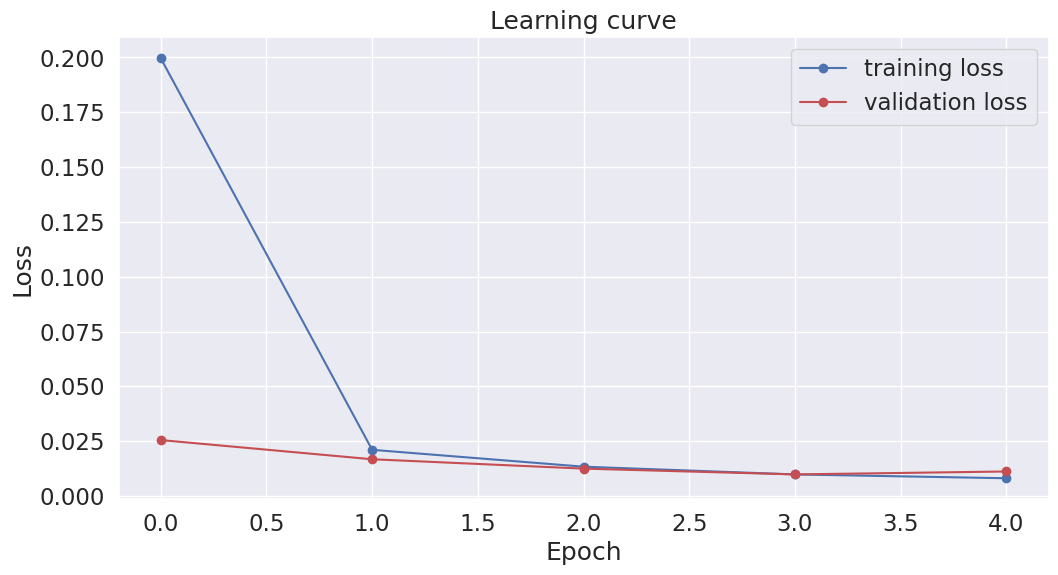

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

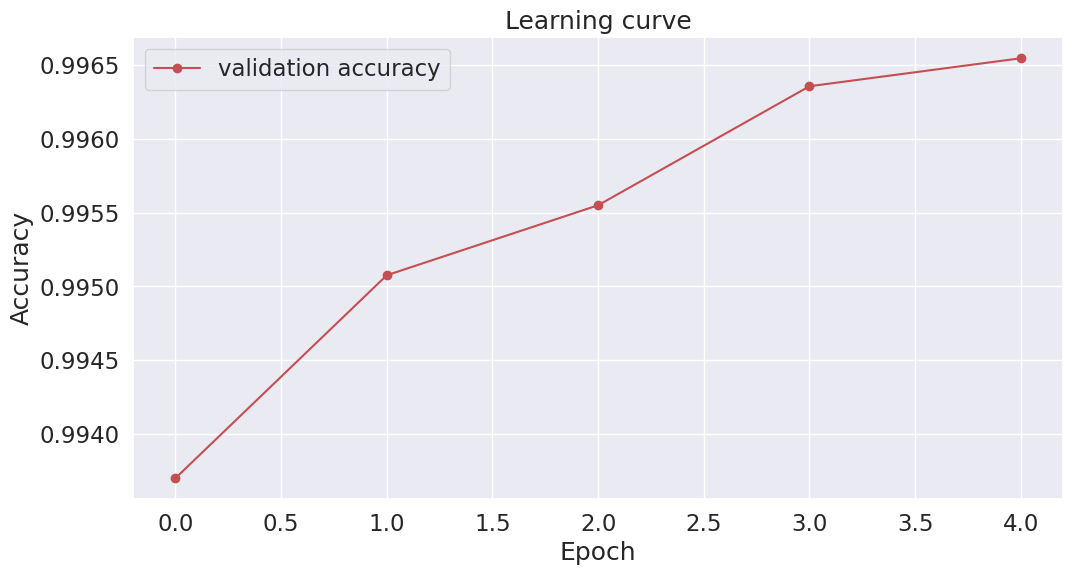

In [ ]:
#import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)


plt.plot(accuracy_loss_values, 'r-o', label="validation accuracy")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Convertir les prédictions en étiquettes textuelles
pred_tags = [tag_values[p_i] for p, l in zip(predictions, true_labels)
                         for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]
valid_tags = [tag_values[l_i] for l in true_labels
                              for l_i in l if tag_values[l_i] != "PAD"]


print(classification_report(valid_tags, pred_tags))


              precision    recall  f1-score   support

   B-CATTYPE       0.97      0.97      0.97       151
      B-CURR       0.99      1.00      1.00       236
       B-FPR       0.78      1.00      0.88         7
   B-HOTNAME       1.00      0.99      1.00       255
      B-INCL       1.00      0.75      0.86         4
    B-NIGHTS       1.00      1.00      1.00       124
       B-OCC       1.00      1.00      1.00       129
        B-PR       0.99      0.98      0.98       350
     B-PTYPE       1.00      1.00      1.00       120
     B-RACAT       1.00      1.00      1.00       331
     B-RNAME       0.97      0.99      0.98       188
    B-RONAME       0.97      1.00      0.99       206
       B-SLD       1.00      1.00      1.00        15
      B-STAR       1.00      1.00      1.00       430
    B-TAXCAT       0.50      1.00      0.67         1
    B-TAXVAL       0.67      1.00      0.80         2
   I-CATTYPE       1.00      0.97      0.99       324
      I-CURR       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Convertir les prédictions et étiquettes réelles en un format unidimensionnel
pred_tags_flat = [tag for sentence_tags in pred_tags_per_sentence for tag in sentence_tags]
valid_tags_flat = [tag for sentence_tags in valid_tags_per_sentence for tag in sentence_tags]

# Si les listes n'ont pas la même longueur, ajustez-les en fonction de la phrase la plus courte
min_length = min(len(pred_tags_flat), len(valid_tags_flat))
pred_tags_flat = pred_tags_flat[:min_length]
valid_tags_flat = valid_tags_flat[:min_length]

# Créer la matrice de confusion
confusion_mat = confusion_matrix(valid_tags_flat, pred_tags_flat)

# Définir les labels des classes
labels = list(set(valid_tags_flat))
labels.sort()

# Créer une heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(20, 15))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédictions')
plt.ylabel('Étiquettes Réelles')
plt.title('Matrice de Confusion')
plt.show()


## **Predictions**

In [ ]:
df[df['label']  == 'HOTEL_NAME'].head(20)

In [ ]:
test_sentence = "room only"

In [ ]:
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()

In [ ]:
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

In [ ]:
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)

In [ ]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))

In [ ]:
model.save_pretrained("/content/drive/MyDrive/trained_model/bert_model")
tokenizer.save_pretrained("/content/drive/MyDrive/trained_model/bert_tokenizer")

# **Second Step : Détection des balises HTML**

### **1) Extraction du texte a partir du code HTML**

In [ ]:
pip install html2text

In [ ]:
import html2text

html_path = "/content/traveloka1.txt"

f = open(html_path)
text = f.read()
f.close()

h = html2text.HTML2Text()
h.ignore_links = True

clean_text=h.handle(text)
sentences = clean_text.split('\n')

len(sentences)

2610

In [ ]:
for sentence in sentences:
  print(type(sentence))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

### **2) Création du Dataframe pour stocker les phrases**

In [ ]:
# Supprimer les espaces inutiles des phrases et les lignes vides
sentences = [sentence.strip() for sentence in sentences if sentence.strip()]

# Creation du dataframe
data = {"Sentence": sentences}
df = pd.DataFrame(data)
sentences[80:90]

['](https://ik.imagekit.io/tvlk/apr-asset/dgXfoyh24ryQLRcGq00cIdKHRmotrWLNlvG-',
 'TxlcLxGkiDwaUSggleJNPRgIHCX6/hotel/asset/10003761-83a5d7788386585c489f0549d7de510c.jpeg?_src=imagekit&tr=h-116,q-40,w-152)',
 '![SPORT_FACILITY Hotel Ciputra Semarang managed by Swiss-Belhotel',
 'International ](https://ik.imagekit.io/tvlk/apr-',
 'asset/dgXfoyh24ryQLRcGq00cIdKHRmotrWLNlvG-',
 'TxlcLxGkiDwaUSggleJNPRgIHCX6/hotel/asset/10003761-5a4626b25ad07cc488535b9662bcd4d8.jpeg?_src=imagekit&tr=h-116,q-40,w-152)',
 '![SPORT_FACILITY Hotel Ciputra Semarang managed by Swiss-Belhotel',
 'International ](https://ik.imagekit.io/tvlk/apr-',
 'asset/dgXfoyh24ryQLRcGq00cIdKHRmotrWLNlvG-',
 'TxlcLxGkiDwaUSggleJNPRgIHCX6/hotel/asset/10003761-5a4626b25ad07cc488535b9662bcd4d8.jpeg?_src=imagekit&tr=h-116,q-40,w-152)']

### **3) Nettoyage des données**

In [ ]:
# Vérifier si le DataFrame contient des valeurs manquantes (lignes vides)
if df["Sentence"].isna().any():
    print("Le DataFrame contient des lignes vides.")
else:
    print("Le DataFrame ne contient pas de lignes vides.")


Le DataFrame ne contient pas de lignes vides.


In [ ]:
import pandas as pd
import re

# Créer une liste pour stocker les phrases filtrées
filtered_sentences = []

# Liste de mots clés pour les commentaires et opinions
comment_keywords = ["comment", "opinion"]

# Liste d'extensions d'images à exclure
image_extensions = [".jpeg", ".jpg", ".png", ".gif"]

# Filtrer les phrases pour exclure les commentaires, opinions et liens d'images
for sentence in sentences:
    if "http" not in sentence:

        if not any(keyword in sentence.lower() for keyword in comment_keywords):

            if not any(extension in sentence.lower() for extension in image_extensions):
                filtered_sentences.append(sentence)


# Créer un DataFrame à partir des phrases filtrées
df = pd.DataFrame(filtered_sentences, columns=["Sentences"])

df


,Sentences
0,Download App
1,Partner with Us
2,Saved
3,My Booking
4,IDR
...,...
1069,Rp 6.185.950
1070,Taxes and fees
1071,Rp 1.299.050
1072,Total payment


In [ ]:
sentences = df["Sentences"].tolist()
sentences[200:215]

['Air Conditioning',
 'See Room Details',
 'See Room Details',
 'Deluxe Twin Room Only',
 'Free Cancellation before 24 Jan 14:00',
 '1 twin bed',
 '2 guests',
 'Without Breakfast',
 'Free WiFi',
 'Free Cancellation',
 'Reschedule Policy Applies',
 'Read Cancellation Policy',
 'Installment is available for credit cardholders',
 'Rp 1.206.667',
 'Rp 905.000']

In [ ]:
import string

# Vérifier si sentence contient unquement de la ponctuation
def contains_only_punctuation(sentence):
    for char in sentence:
        if char not in string.punctuation and char != " ":
            return False
    return True

# Filtrer sentences qui contiennent ponctuation
df = df[~df["Sentences"].apply(contains_only_punctuation)]

### **4) Prédictions avec BERT**

In [ ]:
df

In [ ]:
# Mettre en minuscules les valeurs de la colonne "sentences"
df['Sentences'] = df['Sentences'].str.lower()

<ipython-input-72-43e5c414703b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sentences'] = df['Sentences'].str.lower()


In [ ]:
input_ids = input_ids.to(device)
attention_mask = attention_mask.to(device)

In [ ]:
# Prétraitement et prédiction pour chaque phrase
predicted_tags_all = []
predicted_tokens_all = []

for sentence in sentences:
    # Tokeniser la phrase et obtenir les IDs des tokens
    tokens = tokenizer.tokenize(sentence)
    input_ids = tokenizer.convert_tokens_to_ids(tokens)
    input_ids = torch.tensor(input_ids).unsqueeze(0)
    attention_mask = torch.ones(input_ids.shape)

    # Effectuer la prédiction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Obtenir les prédictions des étiquettes
    predictions = torch.argmax(outputs[0], dim=2).squeeze().tolist()
    #print(predictions)

    # Convertir les indices d'étiquettes en labels en utilisant la mapping tag2idx
    if isinstance(predictions, list):
        predicted_tags = [tag_values[p] for p in predictions]
        predicted_tags_all.append(predicted_tags)
    else:
        predicted_tags_all.append([tag_values[predictions]])

     # Convertir les IDs de tokens en tokens réels
    predicted_tokens = tokenizer.convert_ids_to_tokens(input_ids[0].tolist())
    predicted_tokens_all.append(predicted_tokens)

In [ ]:
tokens

In [ ]:
predicted_tags_all

In [ ]:
# Ajouter les prédictions au DataFrame
df['tokens'] = predicted_tokens_all
df['predicted_tags'] = predicted_tags_all

In [ ]:
df

In [ ]:
print(type(predictions))

In [ ]:
'''from transformers import BertTokenizer, BertForTokenClassification
import torch

# Charger le modèle BERT et le tokenizer
model = BertForTokenClassification.from_pretrained("/content/drive/MyDrive/trained_model")
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/trained_model")

# Prédiction et ajout des étiquettes prédites dans une nouvelle colonne
def predict_tags(sentence):
    # Diviser la phrase en mots en utilisant split()
    words = sentence.split()

    input_ids = []
    attention_mask = []

    for word in words:
        # Trouver les IDs de tokens correspondants à partir du tokenizer d'origine
        word_ids = tokenizer.convert_tokens_to_ids([word])

        # Ajouter les IDs à la liste d'input_ids
        input_ids.extend(word_ids)

        # Créer le masque d'attention
        attention_mask.extend([1] * len(word_ids))

    # Convertir en tenseurs torch
    input_ids = torch.tensor(input_ids).unsqueeze(0)  # Ajouter la dimension du lot
    attention_mask = torch.tensor(attention_mask).unsqueeze(0)

    # Effectuer la prédiction
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)

    # Obtenir les prédictions des étiquettes (indices)
    predictions = torch.argmax(outputs[0], dim=2).squeeze().tolist()

    # Convertir les indices d'étiquettes en étiquettes en utilisant la mapping du modèle
    label_map = model.config.id2label
    predicted_labels = [label_map[p] for p in predictions]

    return predicted_labels

# Appliquer la fonction de prédiction à chaque phrase dans le DataFrame
df["Predicted_Tags"] = df["Sentences"].apply(predict_tags)

# Afficher le DataFrame avec les étiquettes prédites
print(df)'''

### **5) Localisation des phrases dans le fichier HTML (Détection des balises HTML)**

In [ ]:
file = open(html_path)
html_content = file.read()
soup = BeautifulSoup(html_content, 'html.parser')

balises = []

for index, row in df.iterrows():
  try:
    pattern = re.compile(row["Sentence"])
    balises.append(soup.find(text=pattern).__dict__)
    matching_tag = soup.find(text=pattern).parent

    # Get the previous and next siblings of the matching tag
    previous = soup.find(text=pattern).previous_element
    next = soup.find(text=pattern).next_element


    print(f"Sentence: {row['Sentence']}")
    print("Balise:")
    print(matching_tag)
    print("=" * 50)

    if previous:
            print("Previous Element:")
            print(previous)
    print("=" * 30)

    if next:
            print("Next Element:")
            print(next)
    print("=" * 150)

  except:
    df.drop(index,axis=0,inplace=True)
    index = index + 1
    print(f"Sentence: {row['Sentence']}")
    print("No matching balise found")
    print("=" * 150)

In [ ]:
df['balises'] = balises
df

,Sentence,tokens,predicted_tags,balises
0,Download App,"[Down, ##load, A, ##pp]","[B-RONAME, B-RONAME, B-RONAME, B-RONAME]","{'parent': ['Download App'], 'previous_element..."
1,Partner with Us,"[Partner, with, Us]","[B-RONAME, B-RONAME, B-RONAME]","{'parent': ['Partner with Us'], 'previous_elem..."
2,Saved,"[Save, ##d]","[B-RONAME, B-RONAME]","{'parent': ['Saved'], 'previous_element': ['Sa..."
3,My Booking,"[My, Book, ##ing]","[B-RONAME, B-RONAME, B-RONAME]","{'parent': ['My Booking'], 'previous_element':..."
4,IDR,"[ID, ##R]","[B-RONAME, B-RONAME]","{'parent': ['IDR'], 'previous_element': ['IDR'..."
...,...,...,...,...
1054,Rp 6.185.950,"[R, ##p, 6, ., 185, ., 950]","[B-STAR, B-STAR, I-STAR, I-STAR, I-STAR, I-STA...","{'parent': ['Rp 6.185.950'], 'previous_element..."
1055,Taxes and fees,"[Tax, ##es, and, fees]","[B-RONAME, B-RONAME, B-RONAME, B-RONAME]","{'parent': ['Taxes and fees'], 'previous_eleme..."
1056,Rp 1.299.050,"[R, ##p, 1, ., 29, ##9, ., 05, ##0]","[B-STAR, B-STAR, I-STAR, I-STAR, I-STAR, I-STA...","{'parent': ['Rp 1.299.050'], 'previous_element..."
1057,Total payment,"[Total, payment]","[B-RONAME, B-RONAME]","{'parent': ['{""props"":{""pageProps"":{""rawAppCon..."


In [ ]:
df["balises"].iloc[1]

In [ ]:
from transformers import BertTokenizer, BertForTokenClassification
import torch

# Charger le modèle BERT et le tokenizer
model = BertForTokenClassification.from_pretrained("/content/drive/MyDrive/trained_model")
tokenizer = BertTokenizer.from_pretrained("/content/drive/MyDrive/trained_model", do_lower_case=True)

# Phrase d'exemple
sentence = "Hello world! This is a test sentence."

# Diviser la phrase en mots
words = sentence.split()

input_ids = []
attention_mask = []

for word in words:
    # Trouver les IDs de tokens correspondants à partir du tokenizer
    word_tokens = tokenizer.tokenize(word)
    word_ids = tokenizer.convert_tokens_to_ids(word_tokens)

    # Ajouter les IDs à la liste d'input_ids
    input_ids.extend(word_ids)

    # Créer le masque d'attention
    attention_mask.extend([1] * len(word_ids))

# Convertir en tenseurs torch
input_ids = torch.tensor(input_ids).unsqueeze(0)  # Ajouter la dimension du lot
attention_mask = torch.tensor(attention_mask).unsqueeze(0)

# Effectuer la prédiction
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)

# Obtenir les prédictions des étiquettes
predictions = torch.argmax(outputs[0], dim=2).squeeze().tolist()

print(predictions)


[14, 14, 14, 14, 14, 14, 14, 14, 14]
